In [334]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [436]:
df = pd.read_csv('/content/drive/MyDrive/GOLD ORE REPORTS/ore_report.csv')
df.head()

,ENTRY_DATE,SECTOR,ORE_TYPE,SUPPLIER_STATUS,WET_METRIC_TONS,MOISTURE_PCT,AU_GRADE,METALLURGICAL_RECOVERY_PCT,GRADE_REPORT_DATE,RECOVERY_REPORT_DATE,LIQUIDATION_DATE,COARSE_GOLD_PCT
0,2024-12-07,SOUTH 1,SULFIDE,FORMAL,23.494159,2.972592,0.208557,85.360425,2024-12-08,2024-12-08,2024-12-15,0.222716
1,2024-09-16,SOUTH 2,SULFIDE,INFORMAL,3.810916,2.939830,0.200000,86.622945,2024-09-17,2024-09-17,2024-10-09,0.119432
2,2024-09-29,SOUTH 2,SULFIDE,FORMAL,2.088015,1.035860,1.168763,86.420358,2024-09-30,2024-09-30,2024-10-04,0.284596
3,2024-10-26,SOUTH 2,SULFIDE,INFORMAL,0.918515,2.455781,0.200000,90.000000,2024-10-27,2024-10-31,2024-11-19,0.171972
4,2024-02-09,CENTER 2,OXIDE,INFORMAL,11.717746,1.000000,0.750265,90.000000,2024-02-13,2024-02-10,2024-02-25,0.064131


In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66894 entries, 0 to 66893
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ENTRY_DATE                  66894 non-null  object 
 1   SECTOR                      66894 non-null  object 
 2   ORE_TYPE                    66894 non-null  object 
 3   SUPPLIER_STATUS             66894 non-null  object 
 4   WET_METRIC_TONS             66894 non-null  float64
 5   MOISTURE_PCT                66894 non-null  float64
 6   AU_GRADE                    66894 non-null  float64
 7   METALLURGICAL_RECOVERY_PCT  66894 non-null  float64
 8   GRADE_REPORT_DATE           66894 non-null  object 
 9   RECOVERY_REPORT_DATE        66894 non-null  object 
 10  LIQUIDATION_DATE            66894 non-null  object 
 11  COARSE_GOLD_PCT             66894 non-null  float64
dtypes: float64(5), object(7)
memory usage: 6.1+ MB


In [438]:
date_cols = [
    'ENTRY_DATE',
    'GRADE_REPORT_DATE',
    'RECOVERY_REPORT_DATE',
    'LIQUIDATION_DATE'
]

for col in date_cols:
    df[col] = pd.to_datetime(
        df[col],
        format='mixed',
        dayfirst=True,
        errors='coerce'
    )

In [439]:
df[df[date_cols].isna().any(axis=1)][date_cols].head(10)

,ENTRY_DATE,GRADE_REPORT_DATE,RECOVERY_REPORT_DATE,LIQUIDATION_DATE


In [440]:
bad_rows = (
    (df['GRADE_REPORT_DATE'] < df['ENTRY_DATE']) |
    (df['RECOVERY_REPORT_DATE'] < df['ENTRY_DATE']) |
    (df['LIQUIDATION_DATE'] < df['ENTRY_DATE'])
)

In [441]:
df.loc[bad_rows, 'GRADE_REPORT_DATE'] = (
    df.loc[bad_rows, 'ENTRY_DATE'] + pd.Timedelta(days=1)
)

In [442]:
oxide = bad_rows & (df['ORE_TYPE'].str.upper() == 'OXIDE')
sulfide = bad_rows & (df['ORE_TYPE'].str.upper() == 'SULFIDE')

df.loc[oxide, 'RECOVERY_REPORT_DATE'] = (
    df.loc[oxide, 'ENTRY_DATE'] + pd.Timedelta(days=1)
)

df.loc[sulfide, 'RECOVERY_REPORT_DATE'] = (
    df.loc[sulfide, 'ENTRY_DATE'] + pd.Timedelta(days=2)
)

In [443]:
df.loc[bad_rows, 'LIQUIDATION_DATE'] = (
    df.loc[bad_rows, 'ENTRY_DATE'] + pd.Timedelta(days=4)
)

In [444]:
df['DAYS_TO_GRADE_REPORT'] = (df['GRADE_REPORT_DATE'] - df['ENTRY_DATE']).dt.days
df['DAYS_TO_RECOVERY_REPORT'] = (df['RECOVERY_REPORT_DATE'] - df['ENTRY_DATE']).dt.days
df['DAYS_TO_LIQUIDATION'] = (df['LIQUIDATION_DATE'] - df['ENTRY_DATE']).dt.days

In [445]:
df.loc[
    (df['GRADE_REPORT_DATE'] < df['ENTRY_DATE']) |
    (df['RECOVERY_REPORT_DATE'] < df['ENTRY_DATE']) |
    (df['LIQUIDATION_DATE'] < df['ENTRY_DATE']),
    ['ENTRY_DATE', 'GRADE_REPORT_DATE', 'RECOVERY_REPORT_DATE', 'LIQUIDATION_DATE']
]

,ENTRY_DATE,GRADE_REPORT_DATE,RECOVERY_REPORT_DATE,LIQUIDATION_DATE


In [446]:
df['DAYS_TO_LIQUIDATION'].value_counts()

,count
DAYS_TO_LIQUIDATION,
7,13068
5,10251
8,9996
9,9474
6,8991
4,5284
18,900
15,825
10,735


In [447]:
df['DAYS_TO_GRADE_REPORT'].value_counts()

,count
DAYS_TO_GRADE_REPORT,
1,47036
2,14932
3,3187
4,1732
5,7


In [448]:
df['DAYS_TO_RECOVERY_REPORT'].value_counts()

,count
DAYS_TO_RECOVERY_REPORT,
1,26126
3,18438
2,12458
4,6579
5,3293


In [449]:
df.head()

,ENTRY_DATE,SECTOR,ORE_TYPE,SUPPLIER_STATUS,WET_METRIC_TONS,MOISTURE_PCT,AU_GRADE,METALLURGICAL_RECOVERY_PCT,GRADE_REPORT_DATE,RECOVERY_REPORT_DATE,LIQUIDATION_DATE,COARSE_GOLD_PCT,DAYS_TO_GRADE_REPORT,DAYS_TO_RECOVERY_REPORT,DAYS_TO_LIQUIDATION
0,2024-12-07,SOUTH 1,SULFIDE,FORMAL,23.494159,2.972592,0.208557,85.360425,2024-12-08,2024-12-08,2024-12-15,0.222716,1,1,8
1,2024-09-16,SOUTH 2,SULFIDE,INFORMAL,3.810916,2.939830,0.200000,86.622945,2024-09-17,2024-09-17,2024-10-09,0.119432,1,1,23
2,2024-09-29,SOUTH 2,SULFIDE,FORMAL,2.088015,1.035860,1.168763,86.420358,2024-09-30,2024-09-30,2024-10-04,0.284596,1,1,5
3,2024-10-26,SOUTH 2,SULFIDE,INFORMAL,0.918515,2.455781,0.200000,90.000000,2024-10-27,2024-10-31,2024-11-19,0.171972,1,5,24
4,2024-02-09,CENTER 2,OXIDE,INFORMAL,11.717746,1.000000,0.750265,90.000000,2024-02-13,2024-02-10,2024-02-25,0.064131,4,1,16


# **K-MEANS**

In [450]:
num_cols = [
    'WET_METRIC_TONS',
    'MOISTURE_PCT',
    'AU_GRADE',
    'METALLURGICAL_RECOVERY_PCT',
    'COARSE_GOLD_PCT',
]

cat_cols = [
    'SECTOR',
]

In [451]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_scaled = scaler.fit_transform(df[num_cols])

In [452]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
cat_encoded = encoder.fit_transform(df[cat_cols])

cat_df = pd.DataFrame(
    cat_encoded,
    columns=encoder.get_feature_names_out(cat_cols),
    index=df.index
)

In [453]:
num_df = pd.DataFrame(num_scaled, columns=num_cols, index=df.index)

X_kmeans = pd.concat([num_df, cat_df], axis=1)

In [454]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )

    labels = kmeans.fit_predict(X_kmeans)

    inertias.append(kmeans.inertia_)

    sil = silhouette_score(
        X_kmeans,
        labels,
        sample_size=5000,
        random_state=42
    )

    silhouette_scores.append(sil)

for k, sil in zip(K, silhouette_scores):
    print(f"K = {k} → Silhouette ≈ {sil:.3f}")

K = 2 → Silhouette ≈ 0.164
K = 3 → Silhouette ≈ 0.237
K = 4 → Silhouette ≈ 0.211
K = 5 → Silhouette ≈ 0.210
K = 6 → Silhouette ≈ 0.215
K = 7 → Silhouette ≈ 0.199
K = 8 → Silhouette ≈ 0.206
K = 9 → Silhouette ≈ 0.200
K = 10 → Silhouette ≈ 0.196


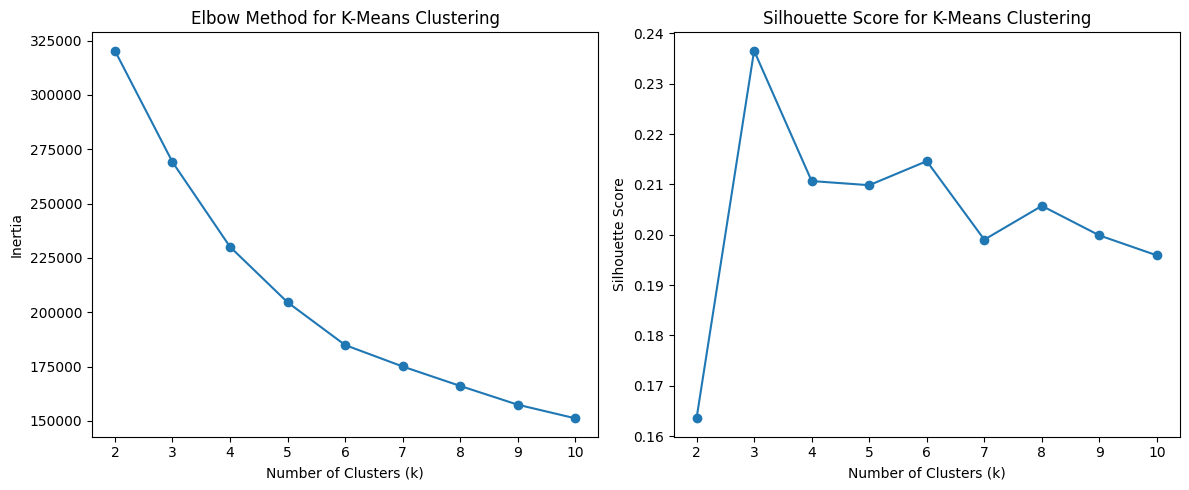

In [455]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means Clustering')

plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering')

plt.tight_layout()
plt.show()

In [456]:
kmeans = KMeans(
    n_clusters=3,
    random_state=42,
    n_init=10
)

clusters = kmeans.fit_predict(X_kmeans)
df['cluster'] = clusters

# **PCA**

In [457]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_kmeans)

pca_df = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2'],
    index=df.index
)

pca_df['cluster'] = clusters

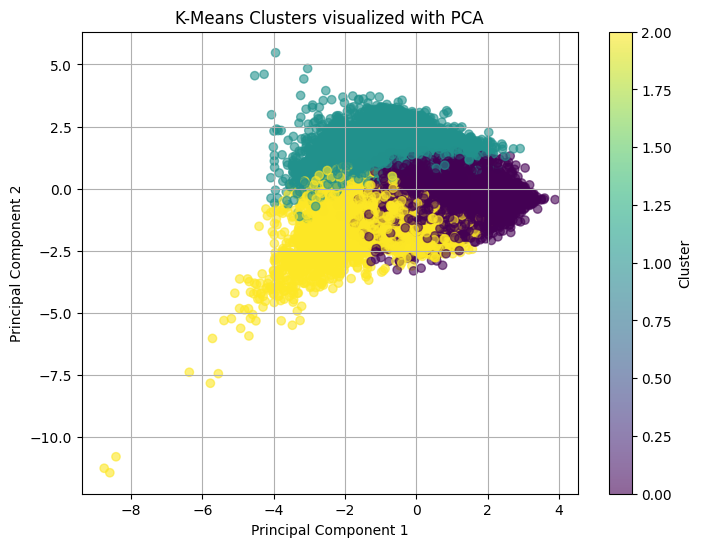

In [458]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    c=pca_df['cluster'],
    alpha=0.6
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters visualized with PCA')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [459]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", pca.explained_variance_ratio_.sum())

Explained variance ratio: [0.24367936 0.19601935]
Total explained variance: 0.4396987051047441


In [460]:
df.groupby('cluster')[num_cols].median()

,WET_METRIC_TONS,MOISTURE_PCT,AU_GRADE,METALLURGICAL_RECOVERY_PCT,COARSE_GOLD_PCT
cluster,,,,,
0,3.926461,3.000000,0.490328,88.944603,0.148078
1,32.335188,3.000000,0.503947,89.000000,0.108556
2,2.063606,1.222211,1.187035,89.622642,0.116167
